# Appendix A

This jupyter notebook provides an example of how two lists of values that have very low correlation scores (and have no reason to be correlated), can have seemingly high measures of correlation if there is any arbitary trend occuring over the list.

Any list of values, that are measured at discrete intervals in time can be reffered to as a timeseries. We will use the term timeseries in this appendix.


# imports etc

In [1]:
import numpy as np
import pandas as pd
#from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.stattools import adfuller
from numpy.random import random_sample
%matplotlib inline
sns.set()

Cross correlation

In [2]:
def bk_cov(df1,df2):
    'calc cov from two series'
    X = df1.values
    Xm = df1.values.sum()/len(X)
    Y = df2.values
    Ym = df2.values.sum()/len(Y)
    cov = ( ((X-Xm)*(Y-Ym))/len(Y)).sum()
    return(cov)

In [3]:
def bk_cor(df1,df2):
    'cal corr'
    cor = bk_cov(df1,df2)/np.sqrt(bk_cov(df1,df1) * bk_cov(df2,df2))
    return cor

In [4]:
def bk_crosscorr(df1,df2,lag=0):
    return bk_cor(df1[lag:],df2.shift(lag)[lag:])

In [5]:
def calc_crosscorr(df,col1,col2,lags):
    'calc various cross corr on df with range of lags'
    corrs = [bk_crosscorr(df[col1], df[col2], lag=i) for i in range(lags)]
    return corrs

In [56]:
def compute_crosscorr_mult_inputs(df,yvar,xvars,lags,title=''):
    ''' make df with lagged cross corrs for multiple vars'''
    
    cross_corr_scores = pd.DataFrame()
    for i in xvars:
        corrs = calc_crosscorr(df,yvar,i,lags)
        cross_corr_scores[i] = corrs
    ax = plt.subplot()
    cross_corr_scores.plot(ax=ax)
    ax.set_ylabel('cross-corr coef')
    ax.set_xlabel('lags (months)')
    ax.set_ylim(-0.2,1)
    ax.set_title(title)
    return

# Correlations between two lists of measurements

In [7]:
import numpy as np

In [35]:
np.random.seed(8)

In [36]:
import pandas as pd
from numpy.random import random_sample
import seaborn as sns
sns.set()
%matplotlib inline

#### creating two lists of random values: a & b.

a & b can be thought of as individual timeseries.

In [37]:
i = 300
rand = pd.DataFrame({'a': random_sample(i),'b':random_sample(i)})

Showing the first 5 points in each timeseries:

In [38]:
rand.head()

,a,b
0,0.873429,0.184432
1,0.968541,0.298911
2,0.869195,0.048582
3,0.530856,0.277799
4,0.232728,0.083110


Plot first points in each timeseries

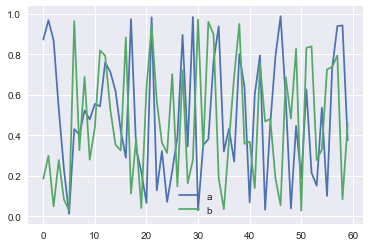

In [39]:
rand[0:60].plot()

Calculating the pearson correlation between the values in each timeseries: we find there is low correlation (0.07) between a & b.

In [40]:
rand.corr().round(2)

,a,b
a,1.00,-0.08
b,-0.08,1.00


# Adding a trend to each time series...

In [79]:
rand['a_with_trend'] = rand.a + rand.index/150

In [80]:
rand['b_with_trend'] = rand.b + rand.index/100

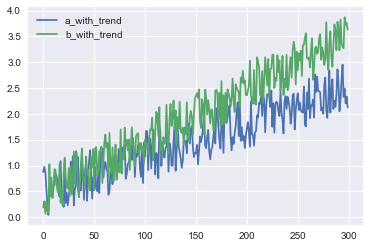

In [81]:
rand[['a_with_trend','b_with_trend']].plot()

The pearson correlation between each list with added trend (a_with_trend & b_with_trend) is very high! (0.96) 

In [83]:
rand.corr().round(2) #[['a_with_trend','b_with_trend']]

,a,b,a_with_trend,b_with_trend,a_trend_diff,b_trend_diff
a,1.00,-0.08,0.42,-0.04,0.66,-0.06
b,-0.08,1.00,0.04,0.39,-0.01,0.71
a_with_trend,0.42,0.04,1.00,0.84,0.29,-0.03
b_with_trend,-0.04,0.39,0.84,1.00,-0.00,0.22
a_trend_diff,0.66,-0.01,0.29,-0.00,1.00,-0.05
b_trend_diff,-0.06,0.71,-0.03,0.22,-0.05,1.00


# Removing the trend in the time series

Differencing each timeseries (subtracting each point from the previous one in the same timeseries) is one way of removing the trend (and hence dependence between points over time). 

In [84]:
rand['a_trend_diff'] = rand.a_with_trend.diff()
rand['b_trend_diff'] = rand.b_with_trend.diff()

The pearson correlation scores between the differenced timeseries (a_trend_diff & b_trend_diff) are very small. THe value is closer to the original correlations between lists (a & b).

In [85]:
rand.corr().round(2)

,a,b,a_with_trend,b_with_trend,a_trend_diff,b_trend_diff
a,1.00,-0.08,0.42,-0.04,0.66,-0.06
b,-0.08,1.00,0.04,0.39,-0.01,0.71
a_with_trend,0.42,0.04,1.00,0.84,0.29,-0.03
b_with_trend,-0.04,0.39,0.84,1.00,-0.00,0.22
a_trend_diff,0.66,-0.01,0.29,-0.00,1.00,-0.05
b_trend_diff,-0.06,0.71,-0.03,0.22,-0.05,1.00


# What do autcorrelations look like before and after differencing?

Autocorrelation gives an indication of the dependence between values and their preceding ones in a list (or timeseries). Correlation scores that remain high for larger lag values suggest that a point in a series is correlated with many of the precedding ones in the series. Here lag refers the number of time points (or places in the list).

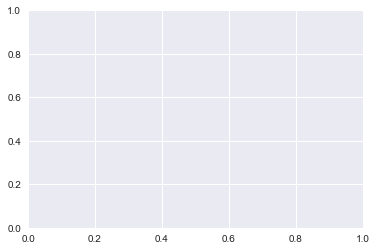

In [86]:
fig = plt.figure()
ax = plt.subplot()

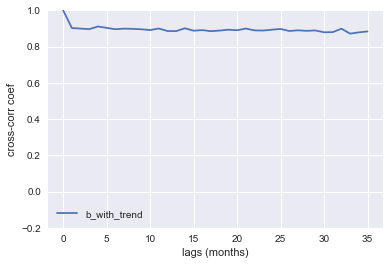

In [87]:
compute_crosscorr_mult_inputs(rand,'b_with_trend',['b_with_trend'],36)

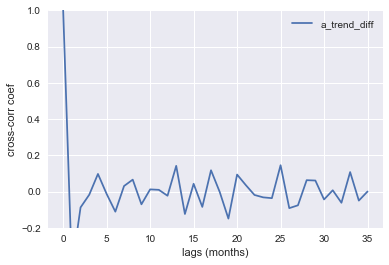

In [88]:
compute_crosscorr_mult_inputs(rand.dropna(),'a_trend_diff',['a_trend_diff'],36)

# Dev

In [23]:
break

SyntaxError: 'break' outside loop (<ipython-input-23-6aaf1f276005>, line 1)

a time series model would presumably attempt to model the trend and then use residuals...so...

In [ ]:
rand['a_trend_resid'] = rand.a_trend - rand.index/100
rand['b_trend_resid'] = rand.b_trend - rand.index/50

In [ ]:
rand[['a_trend_resid','b_trend_resid']].plot()

In [ ]:
rand[['a_trend_resid','b_trend_resid']].corr()

same corr as before!

what do auto-corr & cross-corr look like? - same as what we are seeing in the dtoc data!!

In [ ]:
rand.dropna(inplace=True)

In [ ]:
compute_crosscorr_mult_inputs(rand,'b_trend',['a_trend'],36)

In [ ]:
compute_crosscorr_mult_inputs(rand,'a_trend',['a_trend'],36)

In [ ]:
compute_crosscorr_mult_inputs(rand,'b_trend_diff',['a_trend_diff'],36)